**Marwan Ahmed El Agamy**

**1. Importing libraries**

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**2. Load Dataset**

In [ ]:
df = pd.read_csv("https://bit.ly/prosper-dataset")


**3. Exploring dataset**

In [ ]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [ ]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 113937, dtype: bool

In [ ]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [ ]:
df.describe(include="object").T

count  unique                            top   freq
ListingKey               113937  113066        17A93590655669644DB4C06      6
ListingCreationDate      113937  113064  2013-10-02 17:20:16.550000000      6
CreditGrade               28953       8                              C   5649
LoanStatus               113937      12                        Current  56576
ClosedDate                55089    2802            2014-03-04 00:00:00    105
ProsperRating (Alpha)     84853       7                              C  18345
BorrowerState            108422      51                             CA  14717
Occupation               110349      67                          Other  28617
EmploymentStatus         111682       8                       Employed  67322
GroupKey                  13341     706        783C3371218786870A73D20   1140
DateCreditPulled         113937  112992            2013-12-23 09:38:12      6
FirstRecordedCreditLine  113240   11585            1993-12-01 00:00:00    185
IncomeRange              113937       8                 $25,000-49,999  32192
LoanKey                  113937  113066        CB1B37030986463208432A1      6
LoanOriginationDate      113937    1873            2014-01-22 00:00:00    491
LoanOriginationQuarter   113937      33                        Q4 2013  14450
MemberKey                113937   90831        63CA34120866140639431C9      9

In [ ]:
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

**4. Visualization of column Term**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


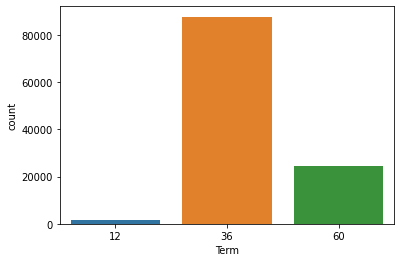

In [ ]:
sns.countplot(df['Term'],label="Count")

**5. Visualization of column LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

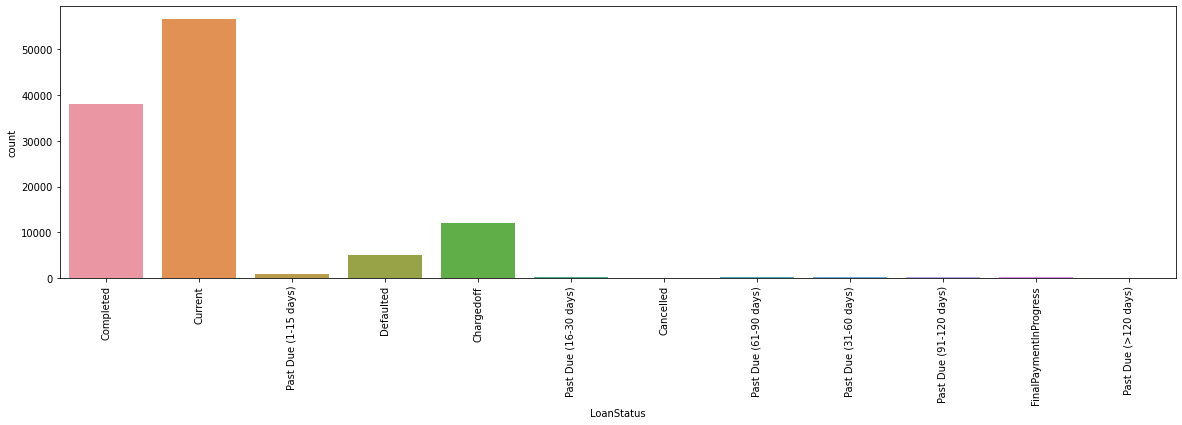

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['LoanStatus'],label="Count")
plt.xticks(rotation=90)

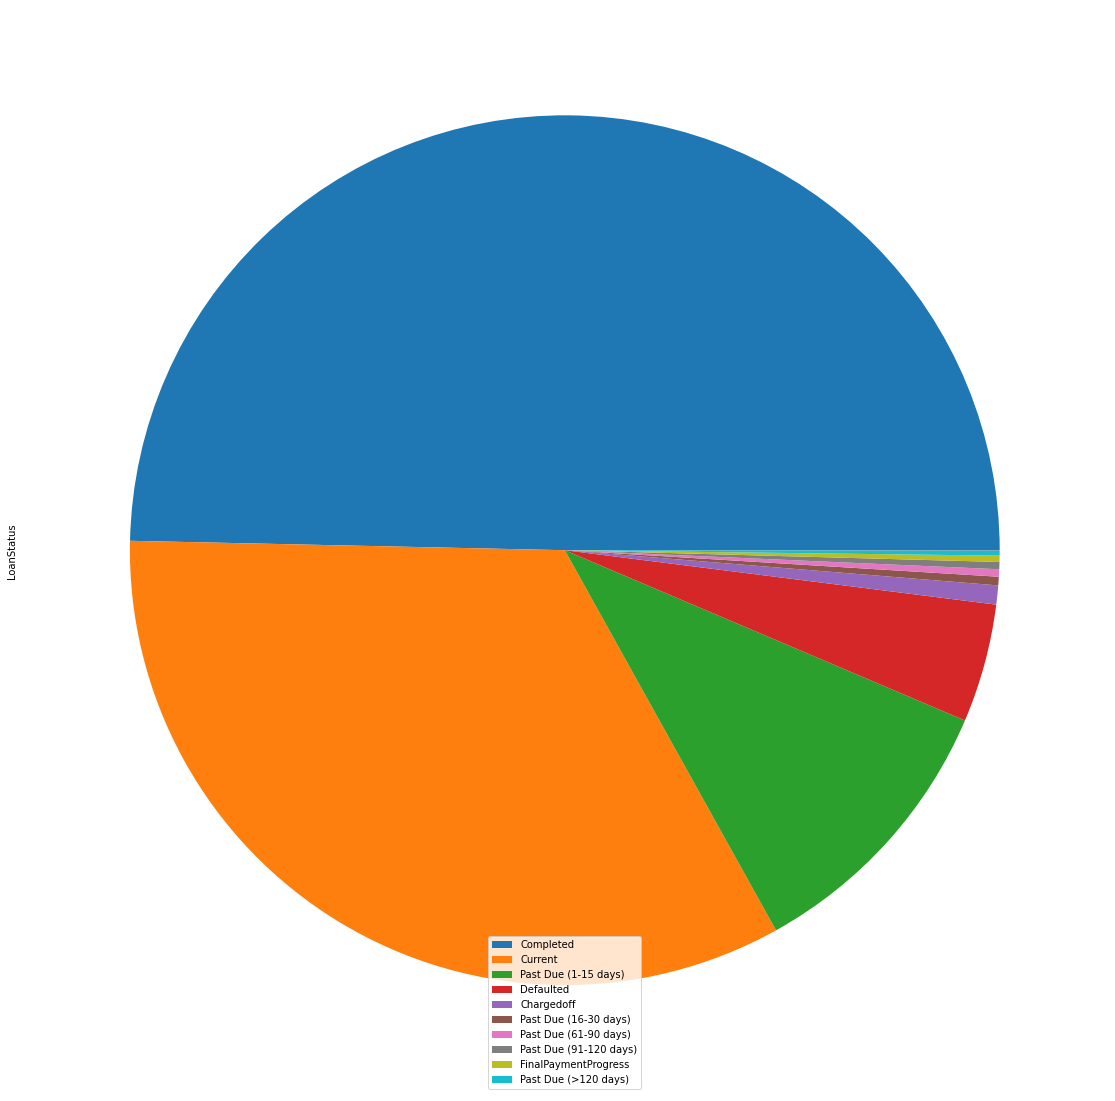

In [ ]:
labels = ['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"]
df['LoanStatus'].value_counts().plot(kind='pie', figsize=(20,20), labels=None)
plt.legend(loc=8, labels=labels)

**6. Visualization of column ProsperScore**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


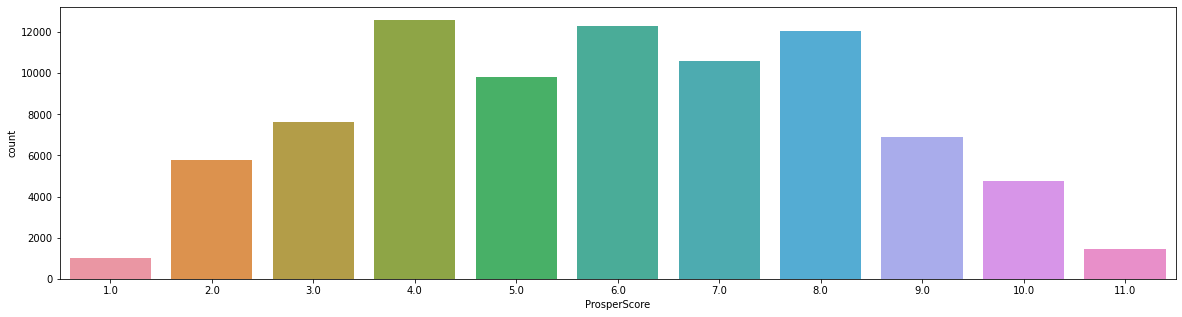

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['ProsperScore'],label="Count")

**7. Visualization of column ListingCategory (numeric)**

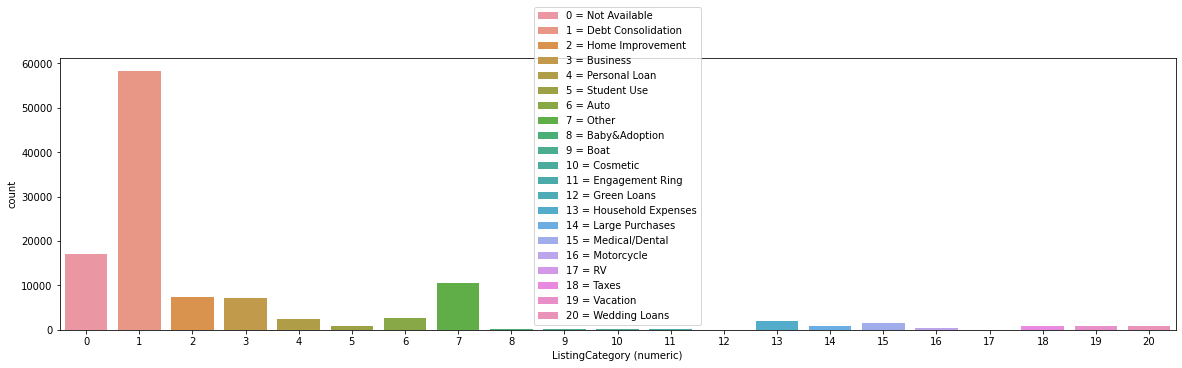

In [ ]:
plt.figure(figsize=(20,5))
labels = ["0 = Not Available","1 = Debt Consolidation", "2 = Home Improvement", "3 = Business" ,"4 = Personal Loan","5 = Student Use","6 = Auto","7 = Other", "8 = Baby&Adoption", "9 = Boat", "10 = Cosmetic","11 = Engagement Ring", "12 = Green Loans", "13 = Household Expenses", "14 = Large Purchases", "15 = Medical/Dental","16 = Motorcycle", "17 = RV" ,"18 = Taxes", "19 = Vacation","20 = Wedding Loans"]
ax = sns.countplot(data=df, x="ListingCategory (numeric)", hue='ListingCategory (numeric)', dodge=False) 
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,loc="best") 
plt.show()

**8. Visualization of column BorrowerState**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


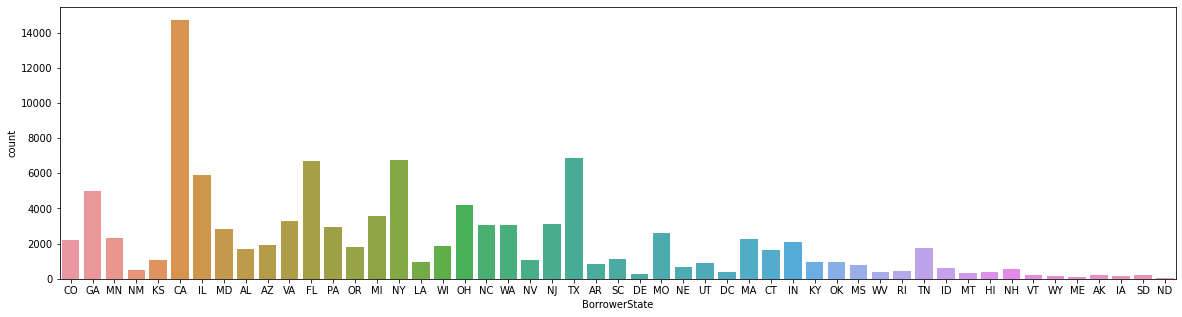

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['BorrowerState'],label="Count")

**9. Visualization of column Occupation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text major ticklabel objects>)

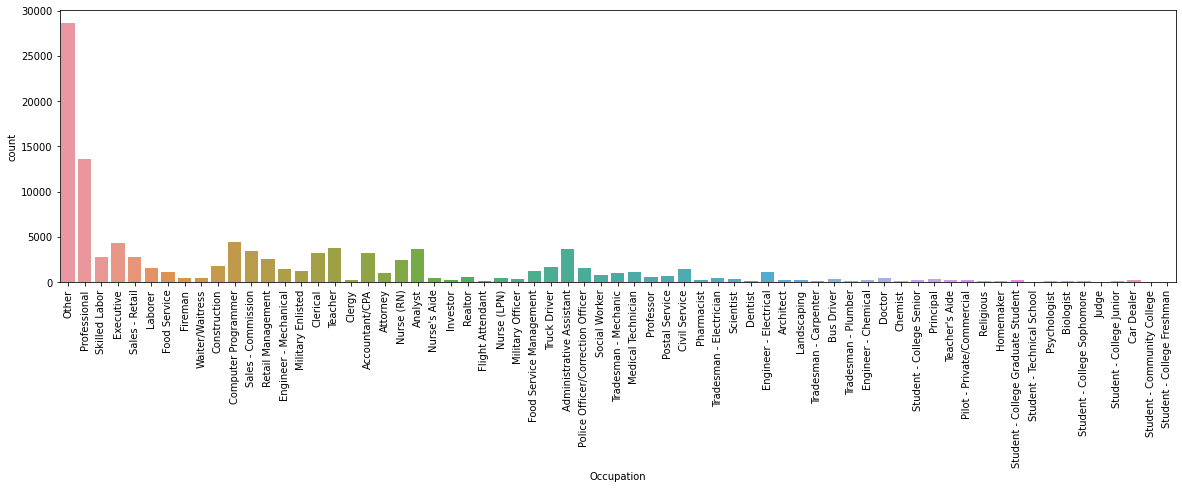

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['Occupation'],label="Count")
plt.xticks(rotation=90)

**10. Visualization of column EmploymentStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


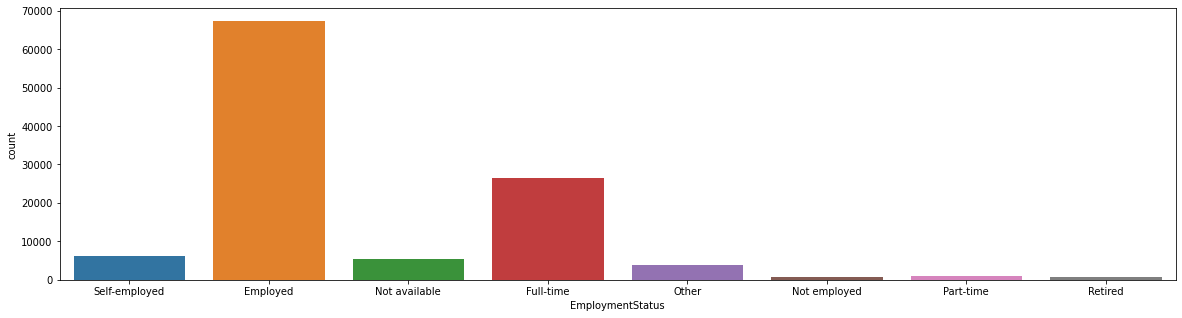

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['EmploymentStatus'],label="Count")

**11. Visualization of column IsBorrowerHomeowner**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


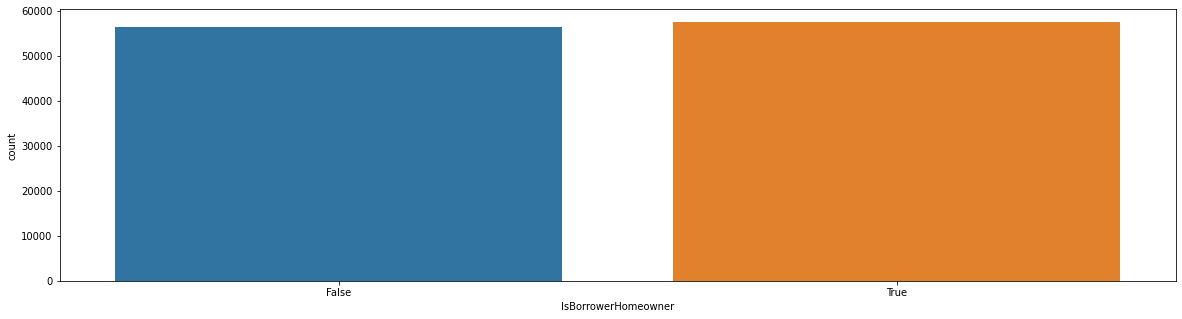

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['IsBorrowerHomeowner'],label="Count")

**12. Visualization of column CurrentlyInGroup**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


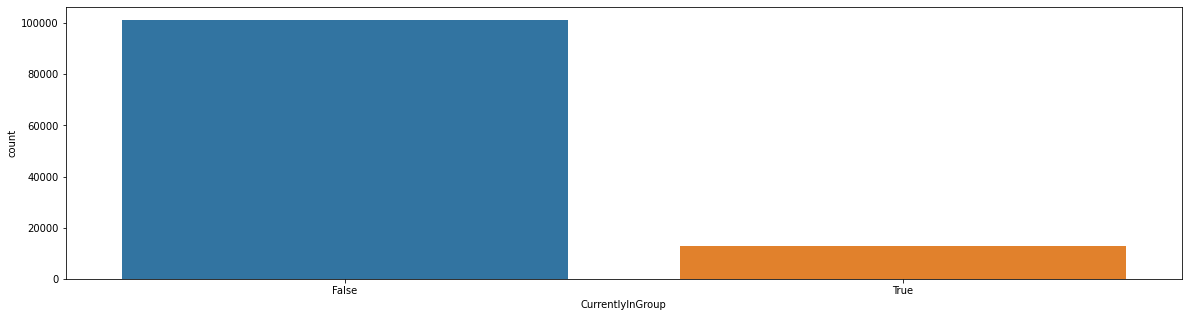

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CurrentlyInGroup'],label="Count")

**13. Visualization of column CreditScoreRange Lower / Upper**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


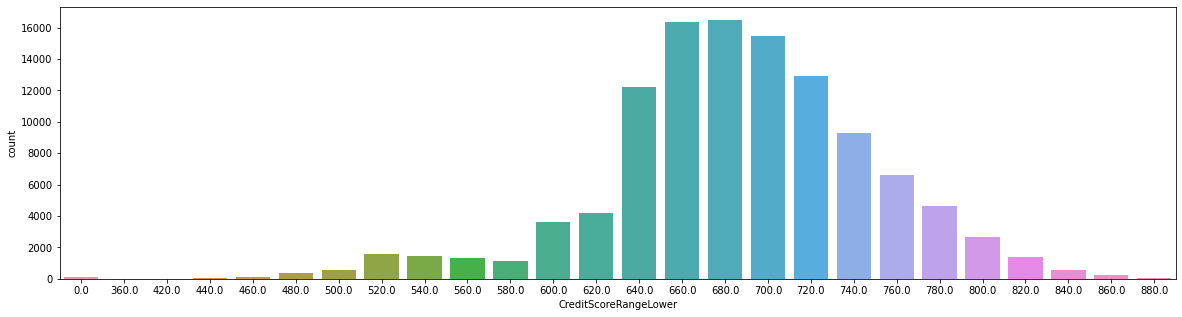

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CreditScoreRangeLower'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


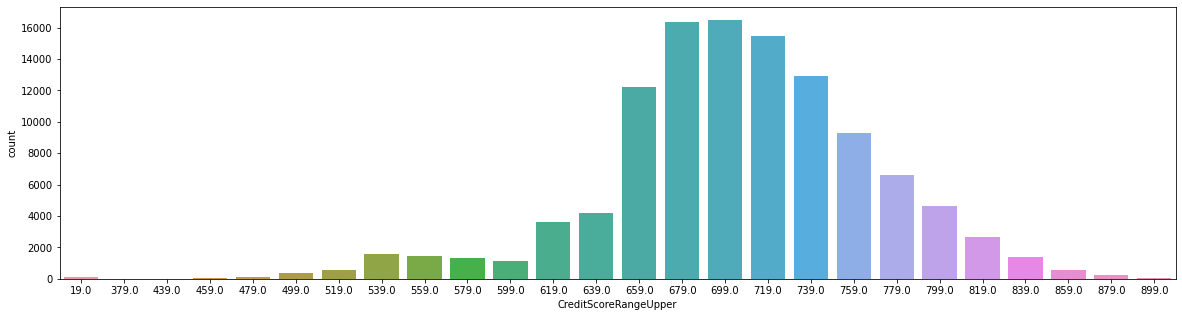

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CreditScoreRangeUpper'],label="Count")

**14. Visualization of column CurrentCreditLines**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

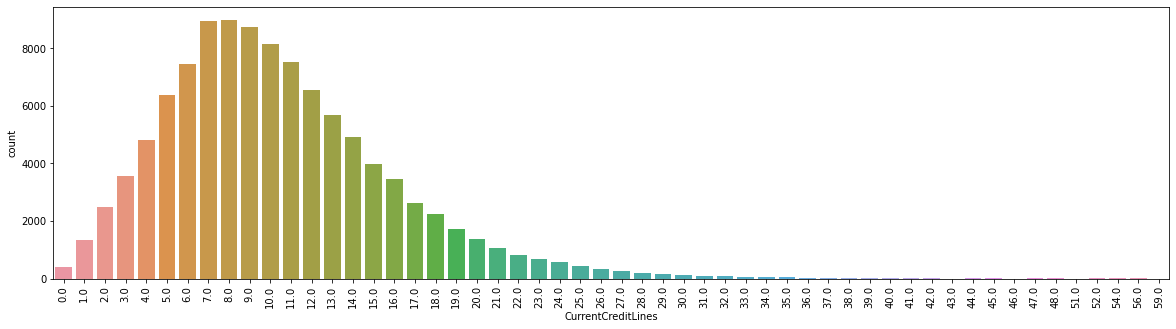

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CurrentCreditLines'],label="Count")
plt.xticks(rotation=90)

**15. Visualization of column OpenCreditLines**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

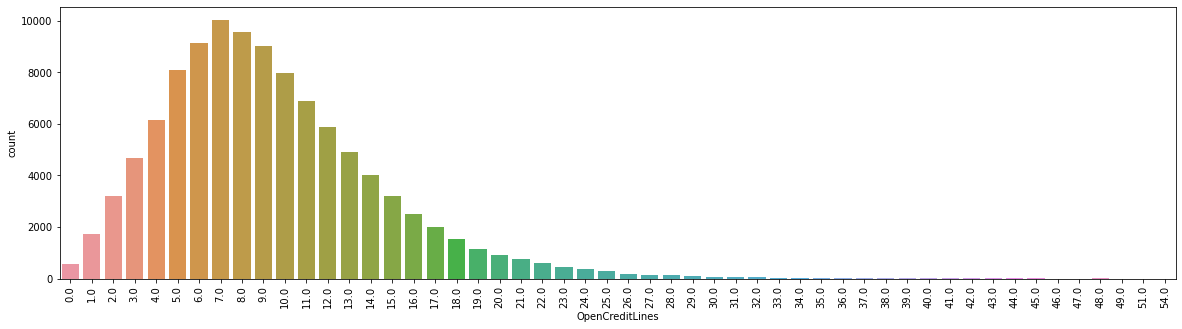

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['OpenCreditLines'],label="Count")
plt.xticks(rotation=90)

**16. Visualization of column TotalCreditLinespast7years**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text major ticklabel objects>)

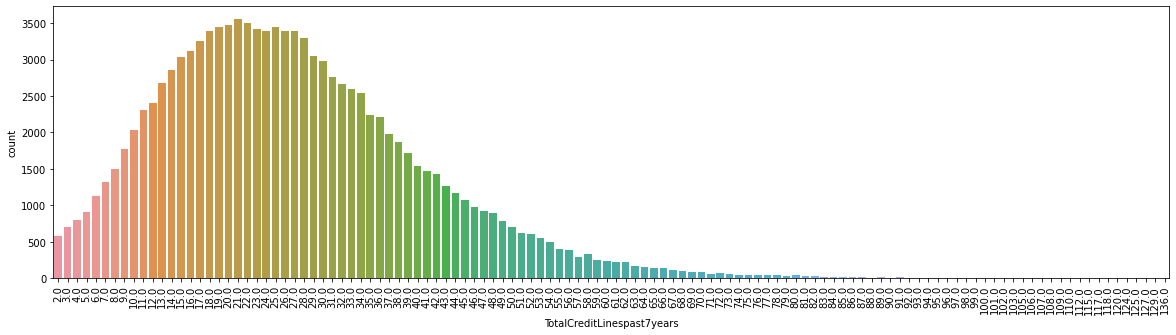

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['TotalCreditLinespast7years'],label="Count")
plt.xticks(rotation=90)

**17. Visualization of other columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

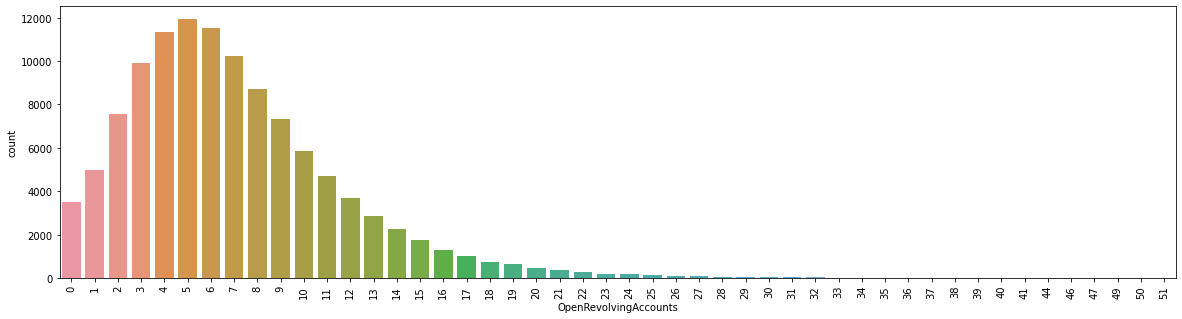

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['OpenRevolvingAccounts'],label="Count")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

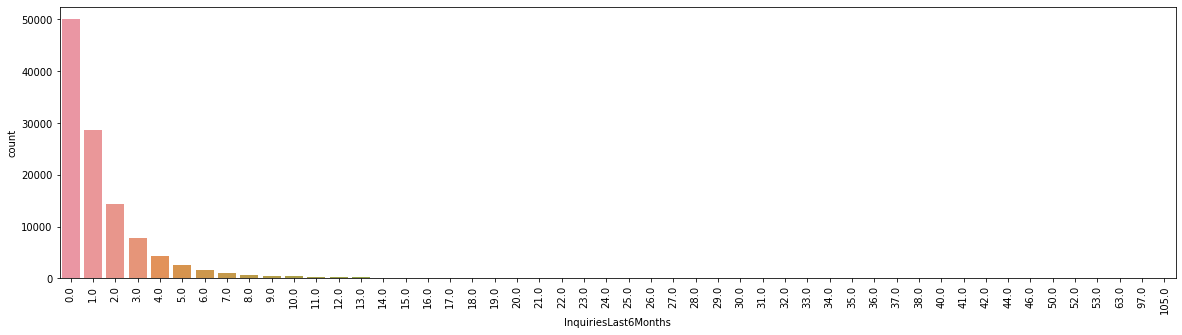

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['InquiriesLast6Months'],label="Count")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text major ticklabel objects>)

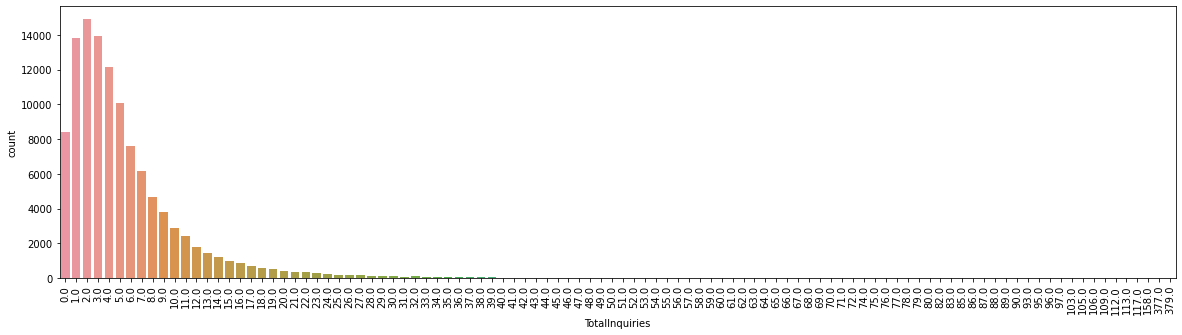

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['TotalInquiries'],label="Count")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

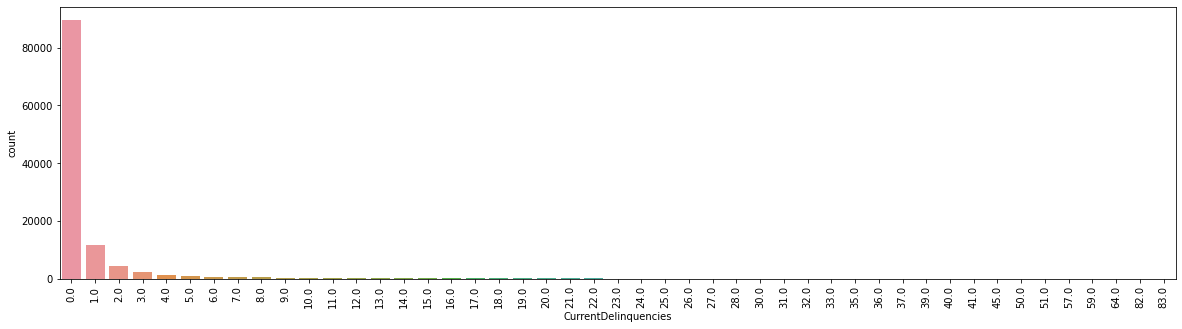

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CurrentDelinquencies'],label="Count")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


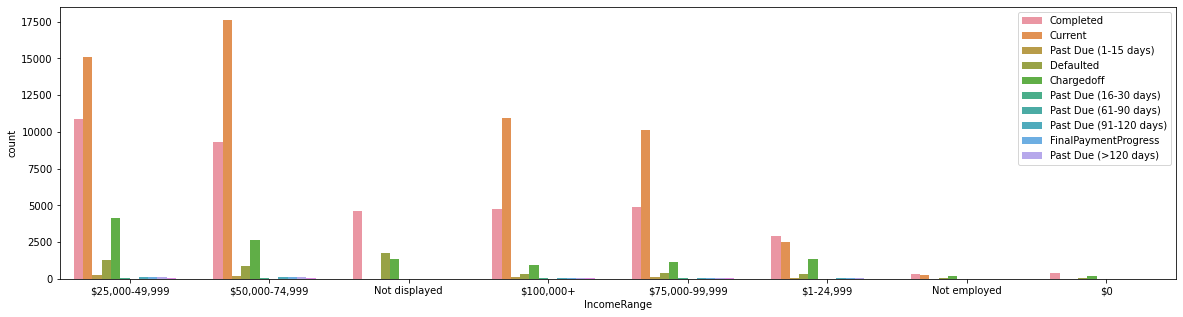

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["IncomeRange"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**18. Correlation table before removing irrelevant features**

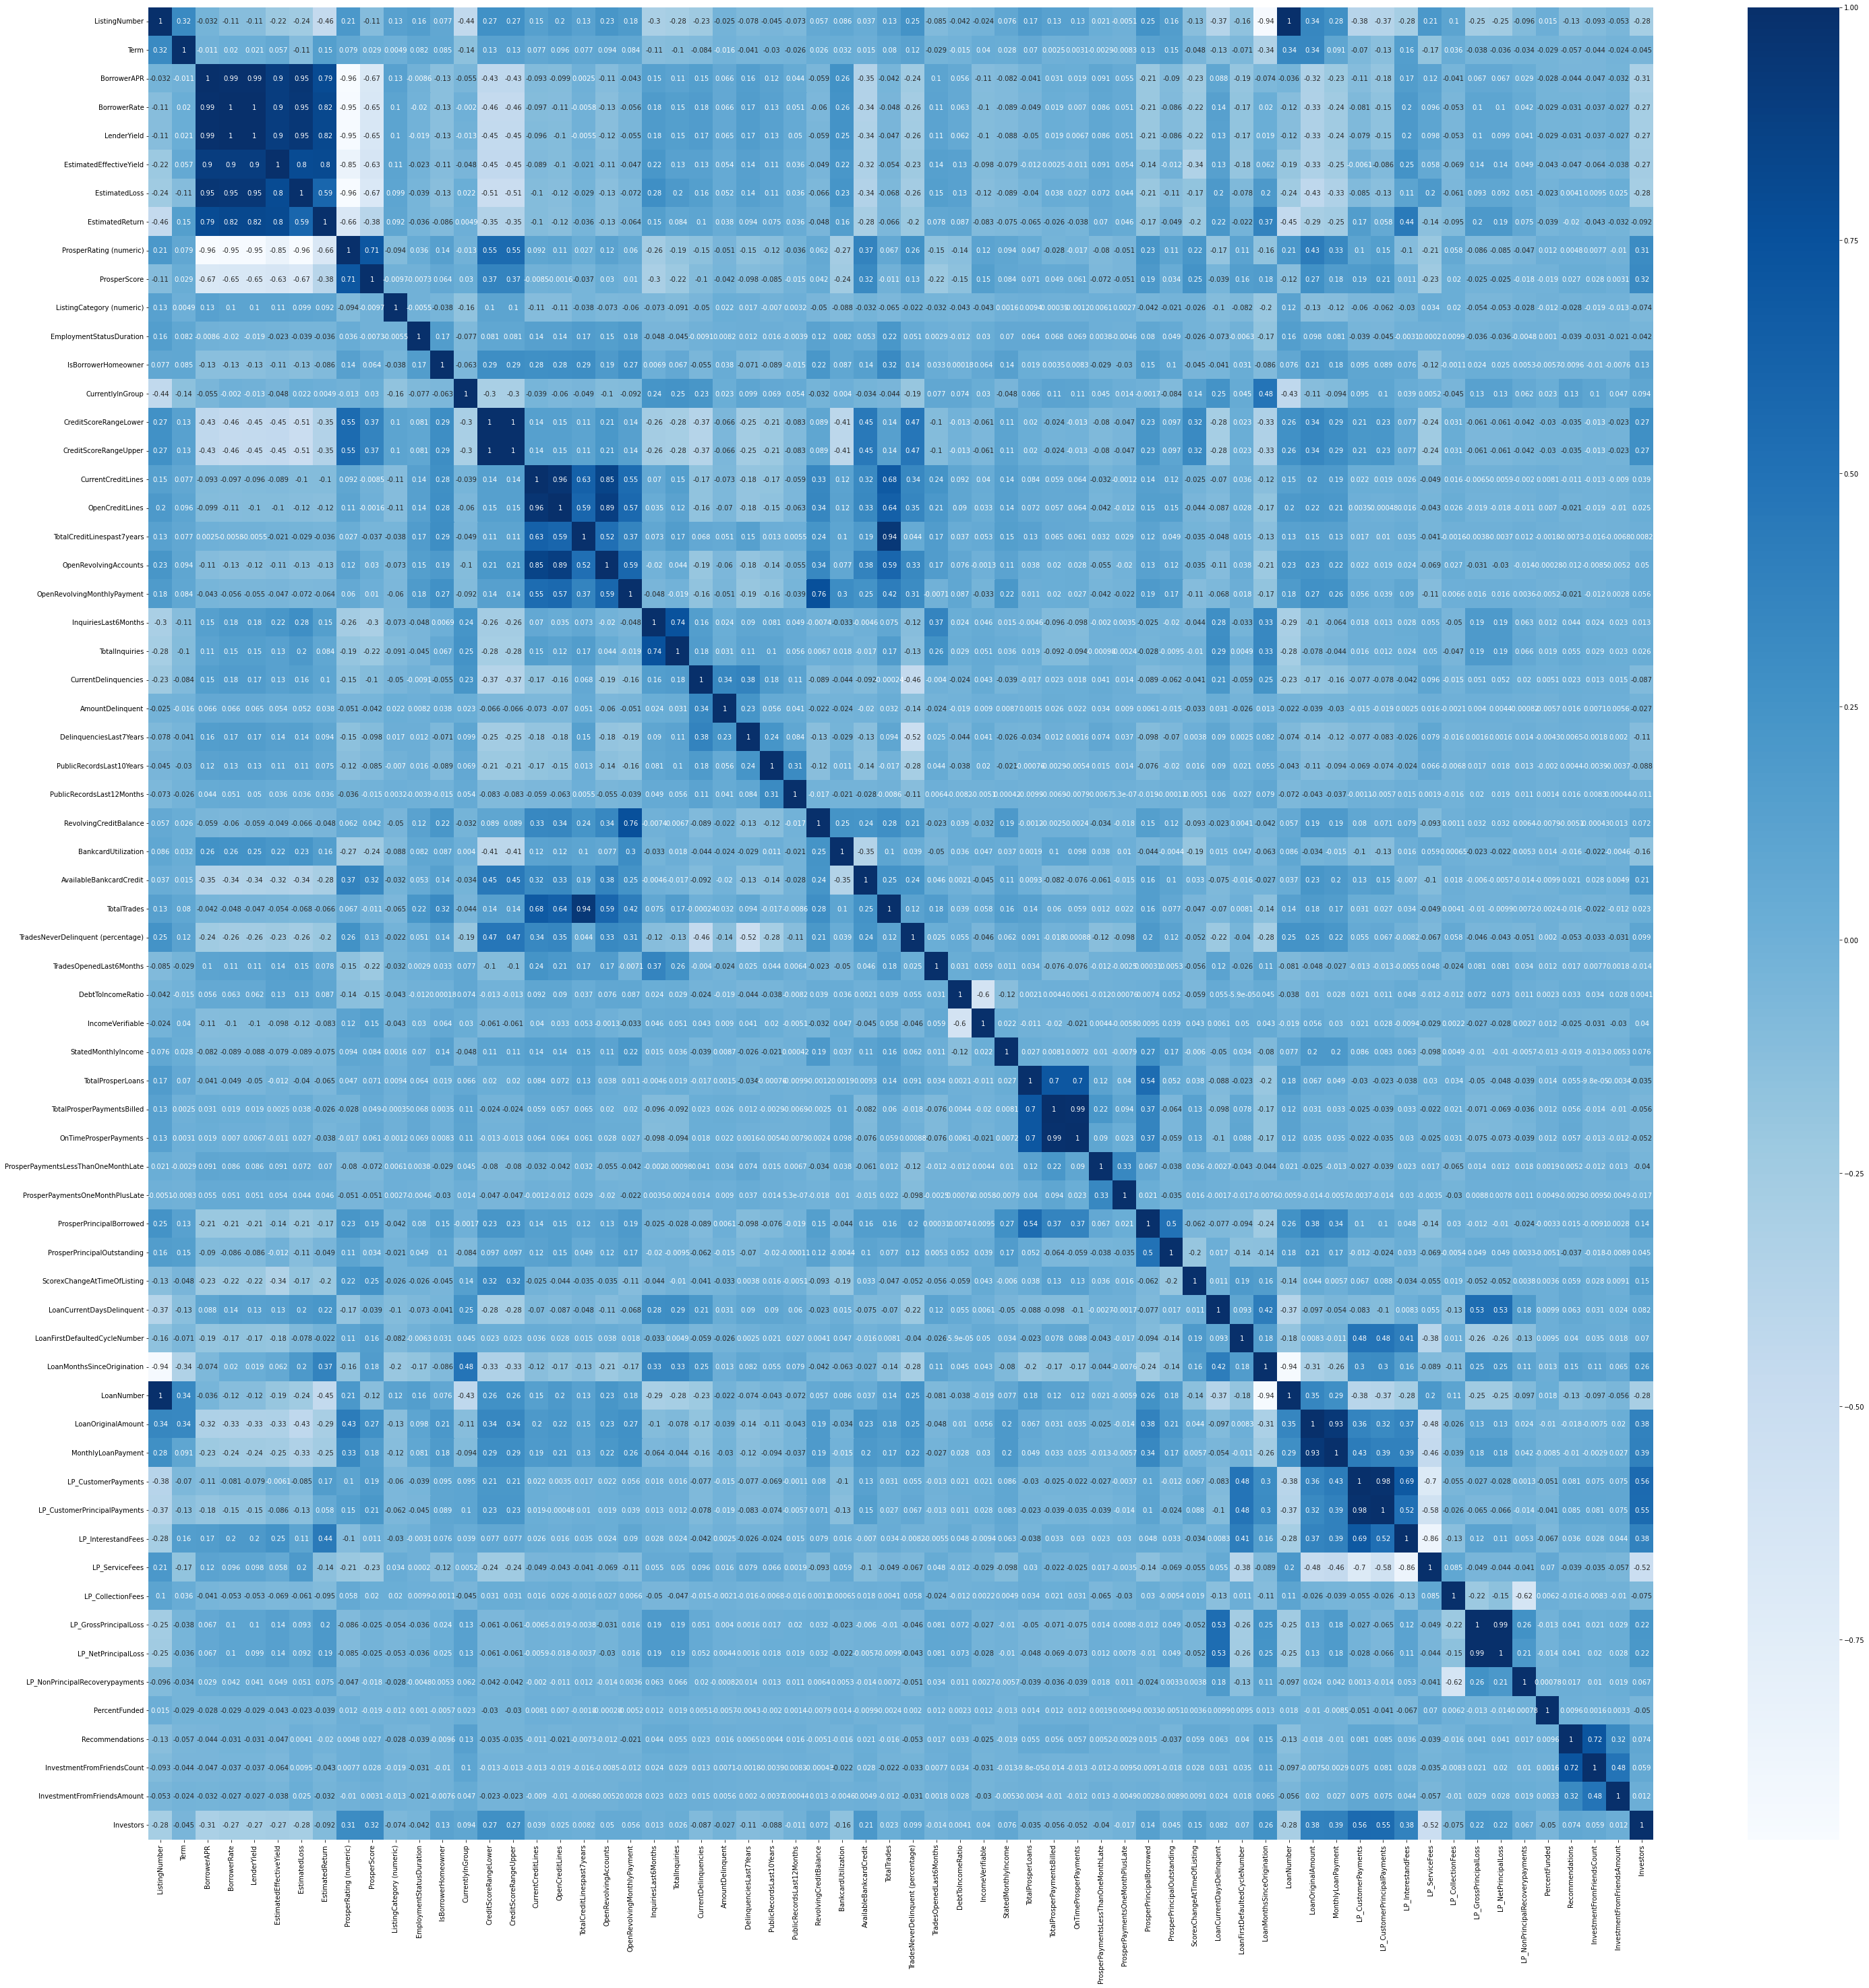

In [ ]:
corr=df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

**Univariate visualization of CreditGrade**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


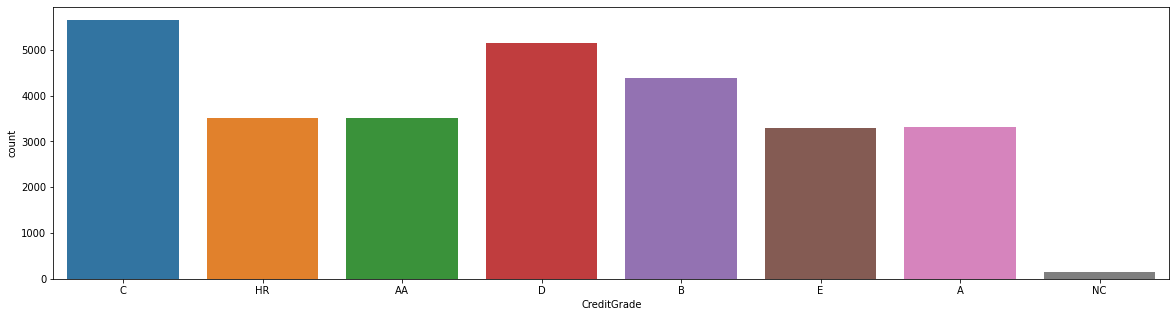

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['CreditGrade'],label="Count")

**Bivariate Relatonship between CreditGrade and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


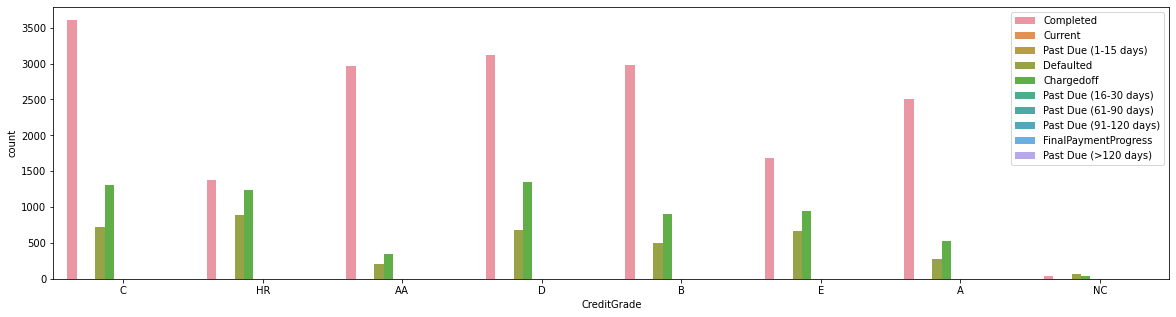

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["CreditGrade"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**Bivariate Relationship between CreditGarde and MonthlyLoan Payment**

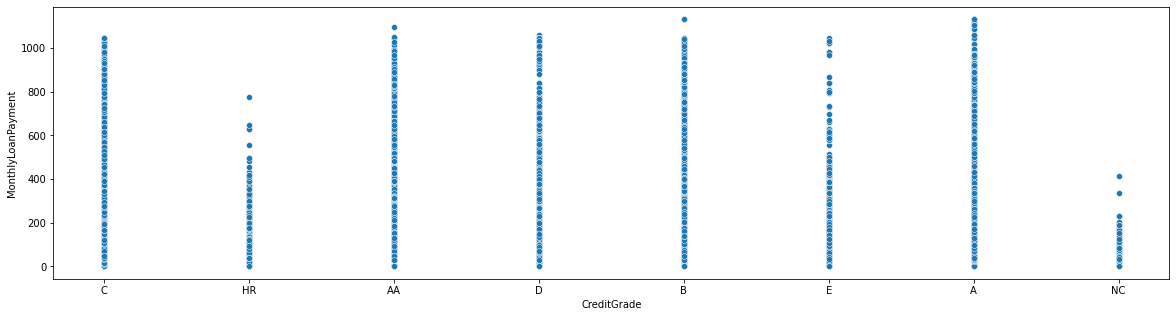

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot( x=df['CreditGrade'], y=df['MonthlyLoanPayment'] )
plt.show()

**19. Correlation table after removing irrelevant features**

In [ ]:
df = df.drop(["ListingKey", "ListingNumber","ListingCreationDate","CreditGrade","ClosedDate","GroupKey","DateCreditPulled","FirstRecordedCreditLine","LoanKey","LoanOriginationDate","LoanOriginationQuarter","MemberKey","LoanNumber","LoanCurrentDaysDelinquent","LoanFirstDefaultedCycleNumber","LoanMonthsSinceOrigination","LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees","LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments"],axis=1)

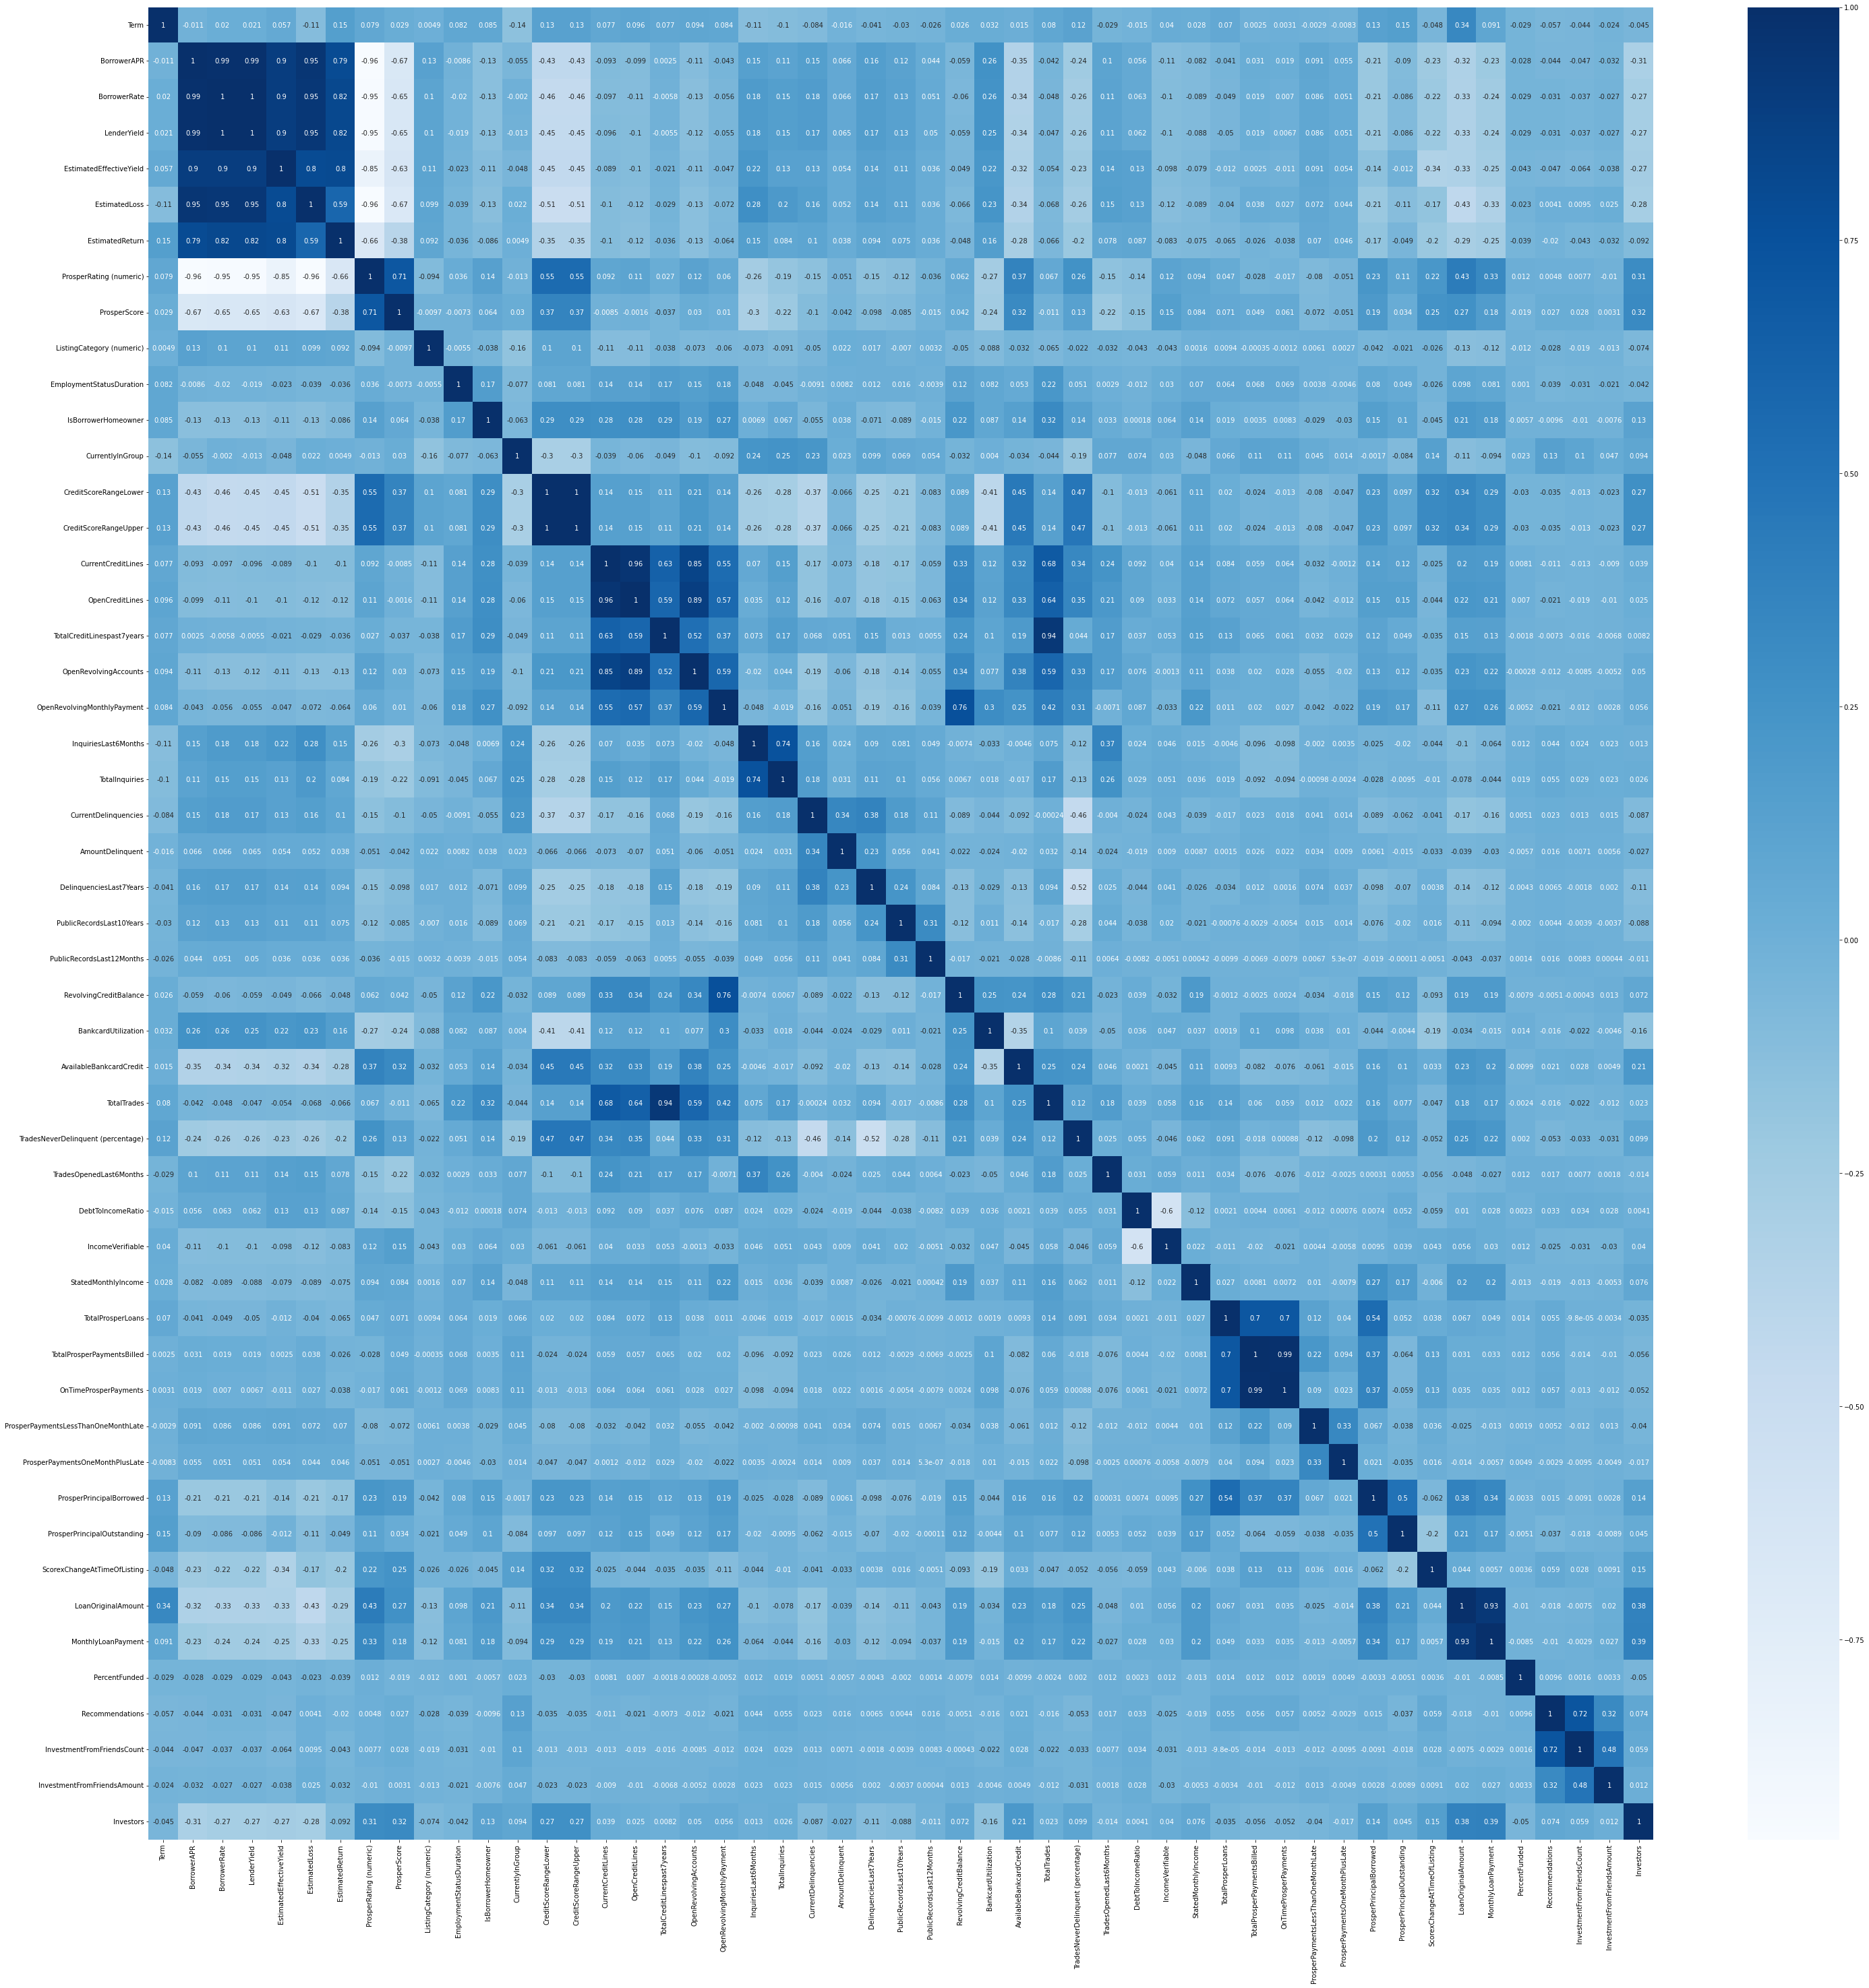

In [ ]:
corr=df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

**20. Visualization between column Term and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


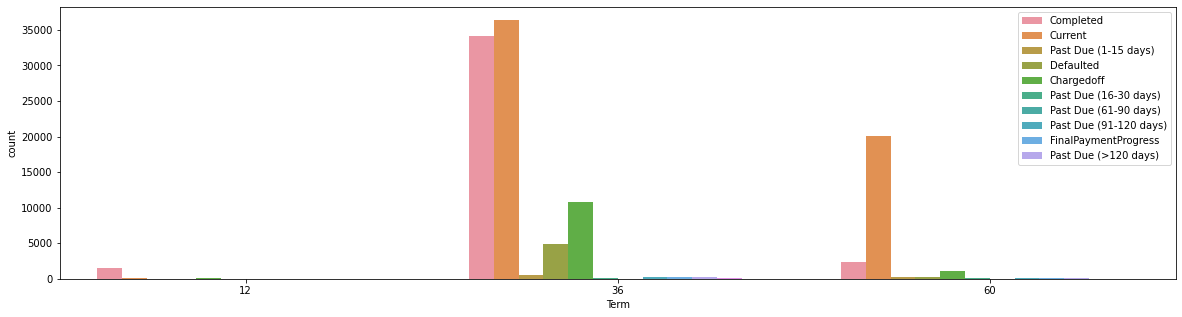

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["Term"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"])
plt.show()

**21. Value counts of BorrowerAPR**

In [ ]:
df['BorrowerAPR'].value_counts(ascending = False)

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

In [ ]:
df['BorrowerAPR'].value_counts(ascending = True)

0.12279       1
0.20990       1
0.07648       1
0.25234       1
0.24864       1
           ... 
0.29510     747
0.30532     902
0.37453    1260
0.35643    1644
0.35797    3672
Name: BorrowerAPR, Length: 6677, dtype: int64

**Multivariate relation between BorrowerRate and BorrowerAPR**

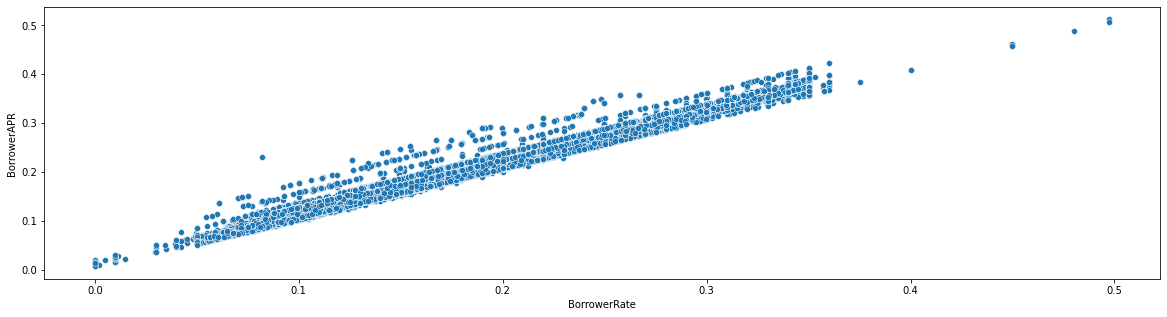

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot( x=df["BorrowerRate"], y= df["BorrowerAPR"] )
plt.show()

**Univariate relationship of Lender Yield on Loan**

In [ ]:
df['LenderYield'].value_counts(ascending = False)

0.3077    3672
0.3400    1916
0.3099    1651
0.2599    1318
0.1450    1011
          ... 
0.0489       1
0.1201       1
0.3334       1
0.2537       1
0.0579       1
Name: LenderYield, Length: 2283, dtype: int64

In [ ]:
df['LenderYield'].value_counts(ascending = True)

0.2546       1
0.1407       1
0.2853       1
0.2752       1
0.2664       1
          ... 
0.1450    1011
0.2599    1318
0.3099    1651
0.3400    1916
0.3077    3672
Name: LenderYield, Length: 2283, dtype: int64

**22. Fixing null values on the relevant features**

In [ ]:
df["BorrowerAPR"] = df["BorrowerAPR"].fillna(value=df["BorrowerAPR"].median())
df["EstimatedEffectiveYield"] = df["EstimatedEffectiveYield"].fillna(value=df["EstimatedEffectiveYield"].median())
df["EstimatedLoss"] = df["EstimatedLoss"].fillna(value=df["EstimatedLoss"].median())
df["EstimatedReturn"] = df["EstimatedReturn"].fillna(value=df["EstimatedReturn"].median())
df["ProsperRating (numeric)"] = df["ProsperRating (numeric)"].fillna(value=df["ProsperRating (numeric)"].median())
df["ProsperScore"] = df["ProsperScore"].fillna(value=df["ProsperScore"].median())
df["CreditScoreRangeLower"] = df["CreditScoreRangeLower"].fillna(value=df["CreditScoreRangeLower"].median())
df["CreditScoreRangeUpper"] = df["CreditScoreRangeUpper"].fillna(value=df["CreditScoreRangeUpper"].median())

Droping Null values here will not result in bad prediction as the following columns % null values in it are not significant

In [ ]:
df["ProsperRating (Alpha)"] = df["ProsperRating (Alpha)"].dropna() # % of null = 25%
df["BorrowerState"] = df["BorrowerState"].dropna() # % of null = 4.9%
df["Occupation"] = df["Occupation"].dropna() # % of null = 3.1%
df["EmploymentStatus"] = df["EmploymentStatus"].dropna() # % of null = 2%

**23. Visualization between column ProsperRating (numeric) and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


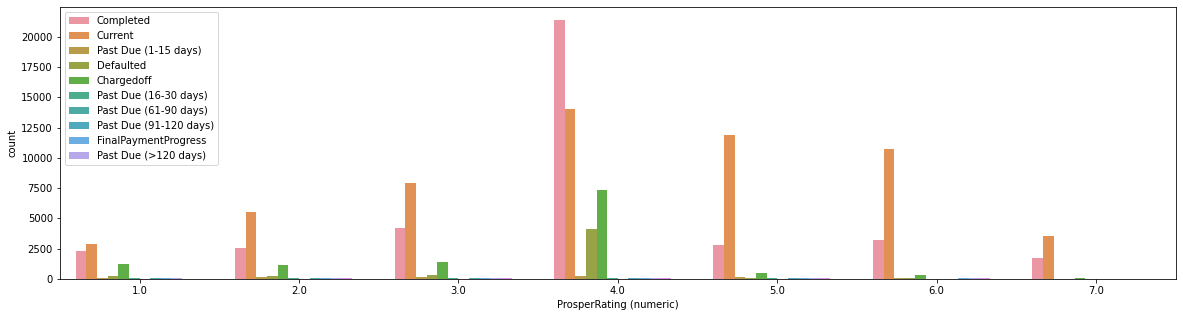

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["ProsperRating (numeric)"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"])
plt.show()

**24. Visualization between column ProsperScore and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


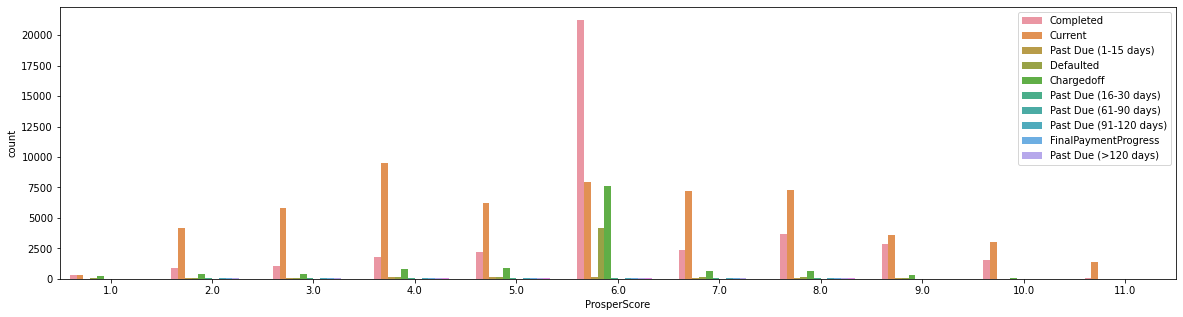

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["ProsperScore"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**25. Visualization between column CreditScoreRange Upper / Lower and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


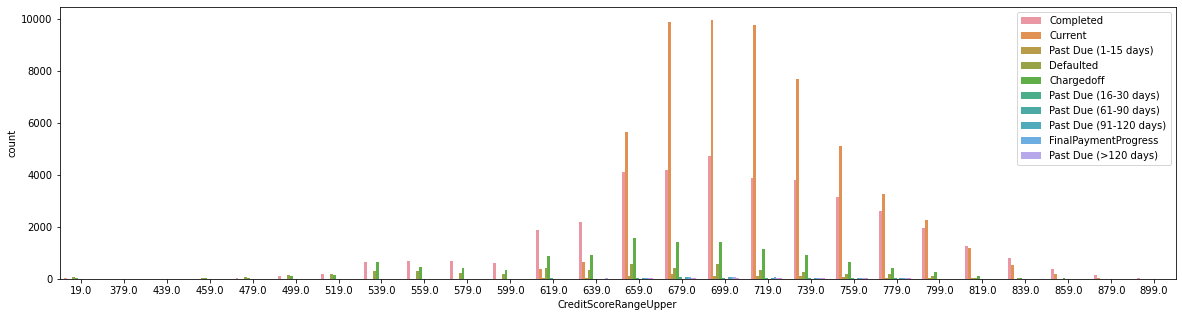

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["CreditScoreRangeUpper"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


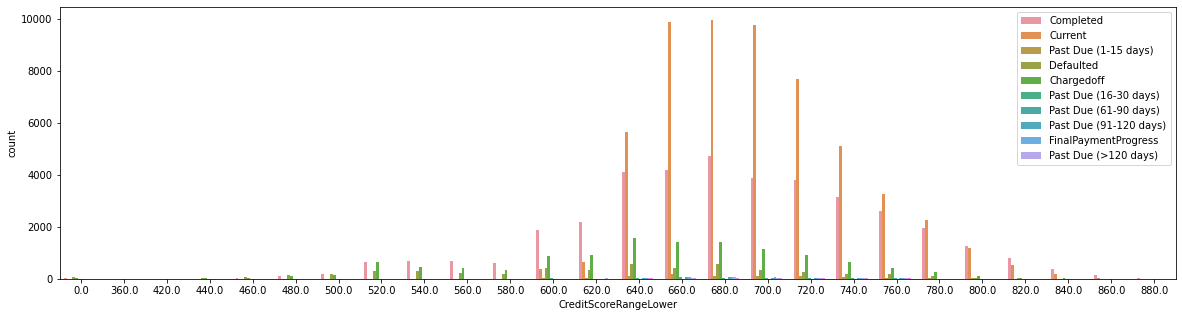

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["CreditScoreRangeLower"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**26. Visualization between column ProsperRating (Alpha) and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


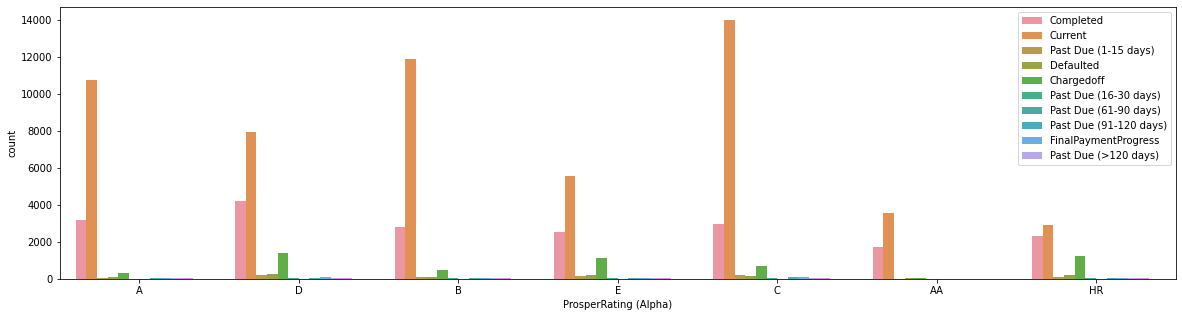

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["ProsperRating (Alpha)"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**27. Visualization between column BorrowerState and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


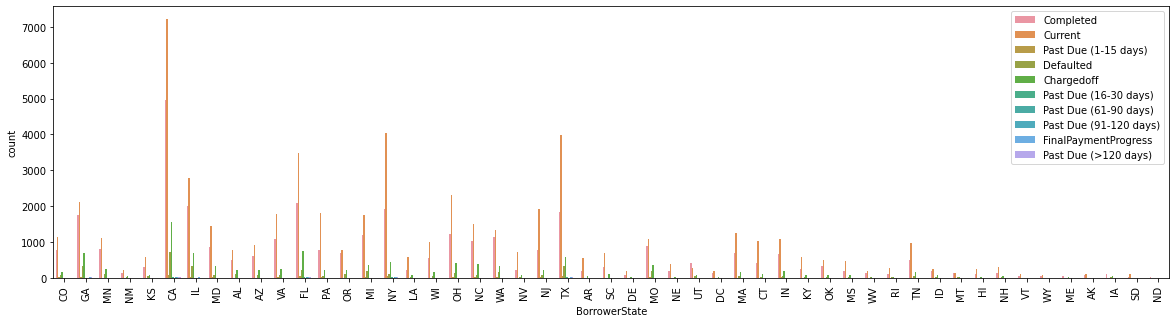

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["BorrowerState"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.xticks(rotation=90)
plt.show()

**28. Visualization between column Occupation and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


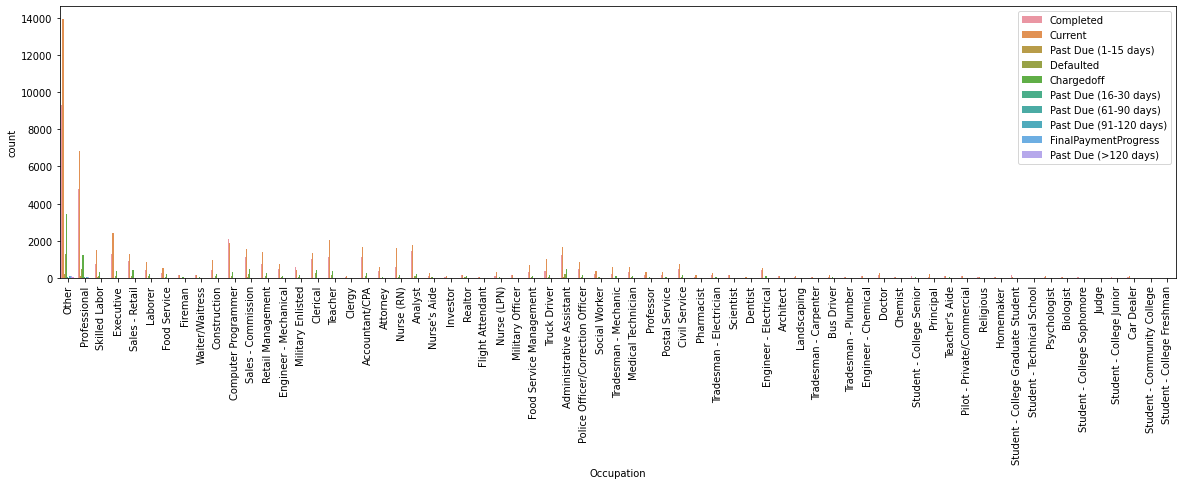

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["Occupation"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.xticks(rotation=90)
plt.show()

**29. Visualization between column EmploymentStatus and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


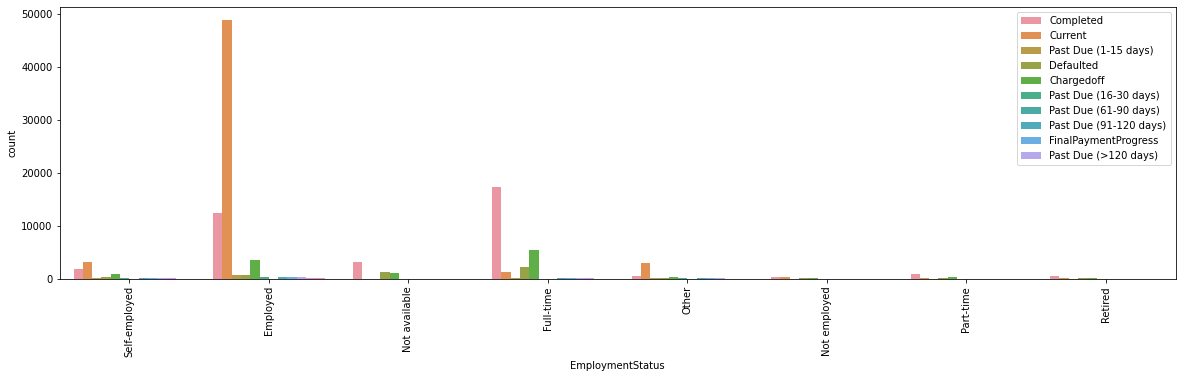

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["EmploymentStatus"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.xticks(rotation=90)
plt.show()

**30. Box plot between CreditScoreRange Lower/Upper and BorrowerRate according to LoanStatus**

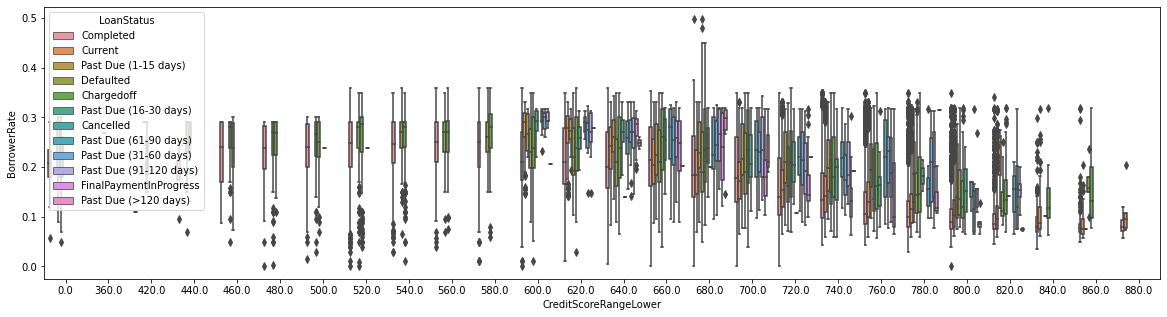

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="CreditScoreRangeLower", y='BorrowerRate', hue='LoanStatus', data=df)

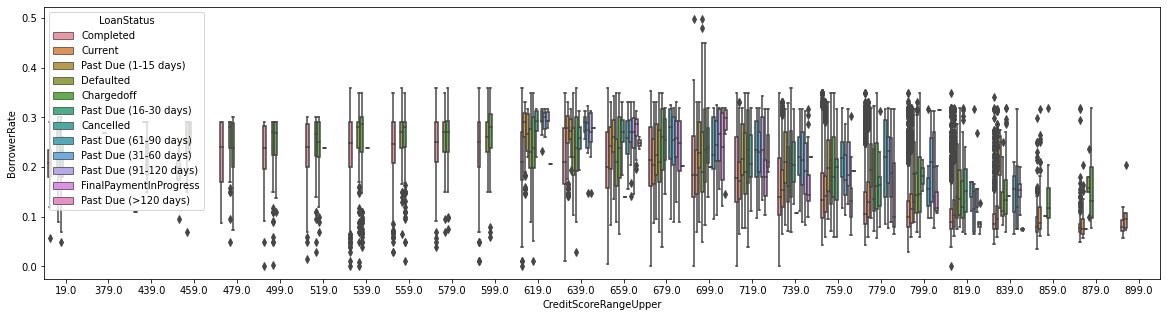

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="CreditScoreRangeUpper", y='BorrowerRate', hue='LoanStatus', data=df)

**31. Converting bool values in columns IsBorrowerHomeowner and IncomeVerifiable into 0 and 1**

In [ ]:
df["IsBorrowerHomeowner"] = df["IsBorrowerHomeowner"].astype(int)
df["IncomeVerifiable"] = df["IncomeVerifiable"].astype(int)

**32. Visualization between column IsBorrowerHomeowner and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


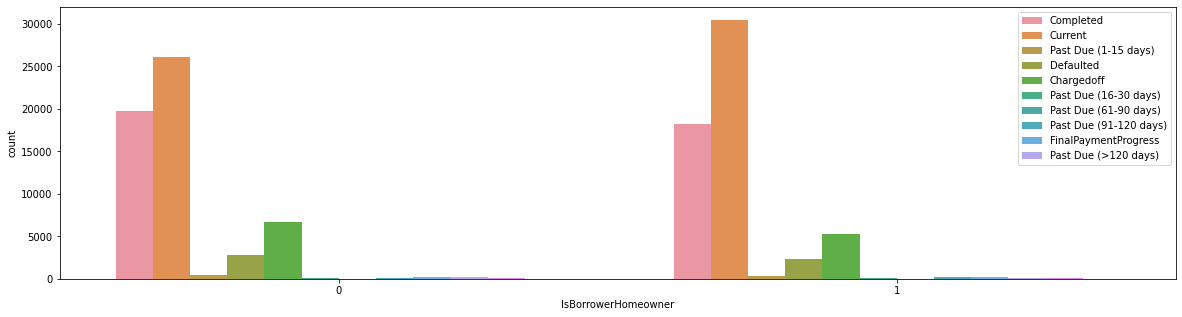

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["IsBorrowerHomeowner"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**33. Visualization between column IncomeVerifiable and LoanStatus**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


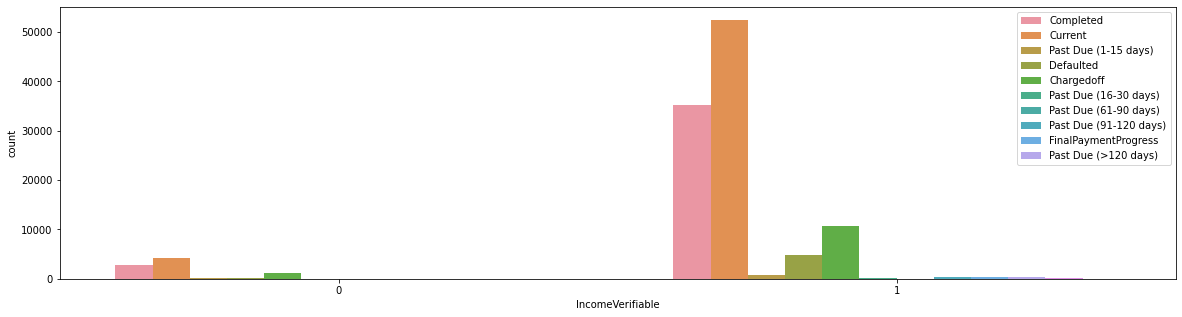

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["IncomeVerifiable"], hue=df["LoanStatus"])
plt.legend(['Completed' , "Current", "Past Due (1-15 days)", "Defaulted","Chargedoff", "Past Due (16-30 days)", "Past Due (61-90 days)", "Past Due (91-120 days)","FinalPaymentProgress", "Past Due (>120 days)"],loc="upper right")
plt.show()

**34. Correlation between some features**

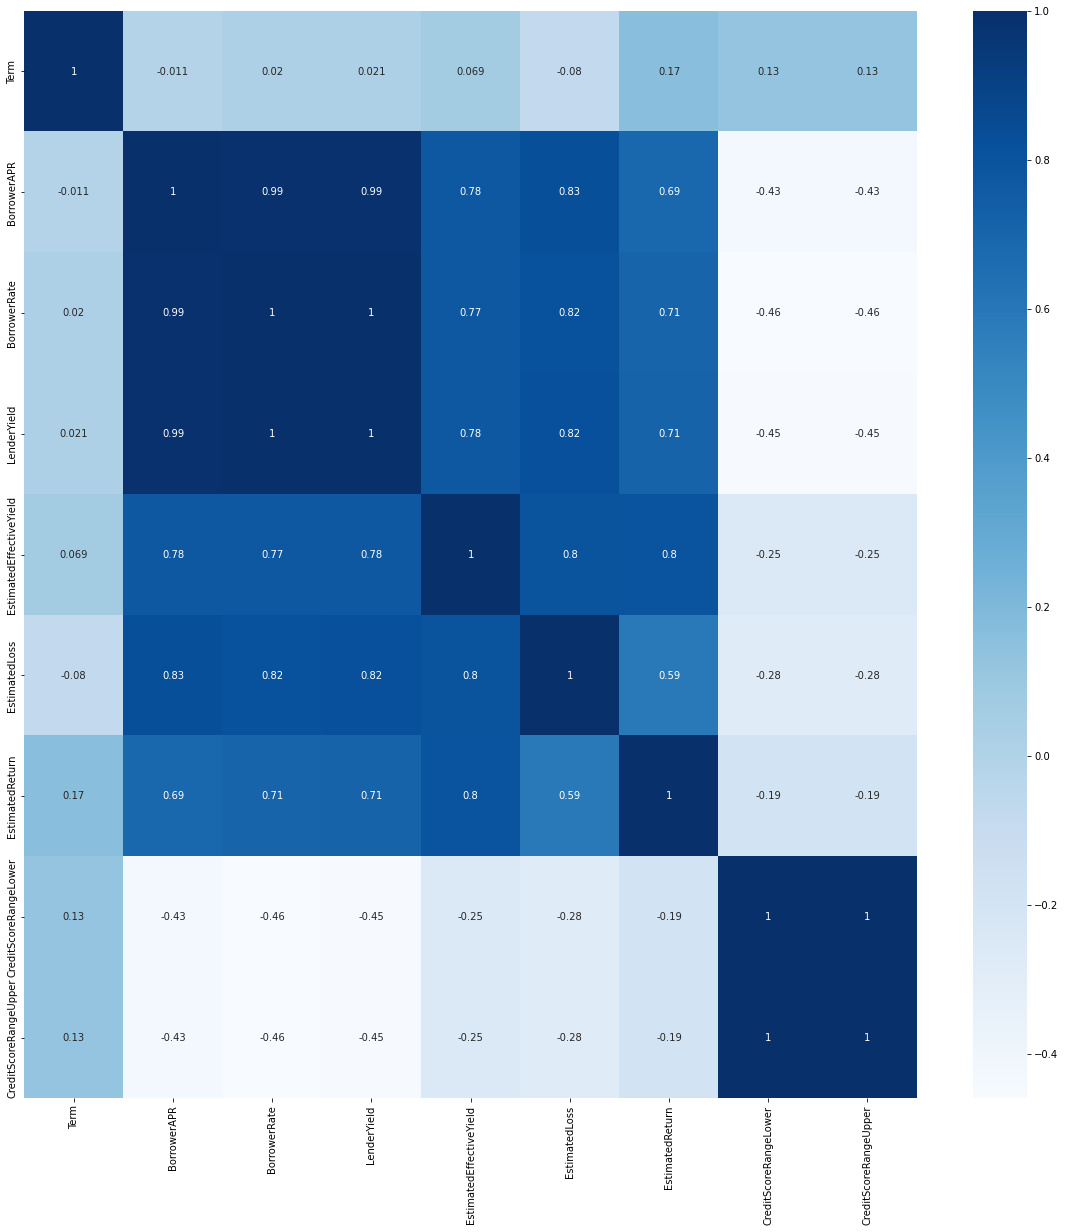

In [ ]:
Z = df[["Term","BorrowerAPR","BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","Occupation","CreditScoreRangeLower","CreditScoreRangeUpper","LoanStatus"]]
corr=Z.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

**35. Data preprocessing / Converting categorical values into numerical and showing the importance of each feature using randomforesetclassifier**

In [ ]:
df = df.dropna()
y = df["LoanStatus"]
X = df.drop(["LoanStatus"],axis=1)
label_encoding_cols=['Occupation',"ProsperRating (Alpha)","BorrowerState","EmploymentStatus","IncomeRange"]
for i in label_encoding_cols:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
rf = RandomForestClassifier(n_estimators = 300,random_state = 1, max_depth=30,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

Feature  Importance
4               EstimatedEffectiveYield    0.049041
55                            Investors    0.042155
6                       EstimatedReturn    0.038790
0                                  Term    0.036116
50                   MonthlyLoanPayment    0.030787
48          ScorexChangeAtTimeOfListing    0.028732
49                   LoanOriginalAmount    0.027897
13                     EmploymentStatus    0.027222
14             EmploymentStatusDuration    0.027207
47          ProsperPrincipalOutstanding    0.027046
5                         EstimatedLoss    0.026647
1                           BorrowerAPR    0.026257
33              AvailableBankcardCredit    0.025602
37                    DebtToIncomeRatio    0.025443
43                OnTimeProsperPayments    0.025404
42           TotalProsperPaymentsBilled    0.025209
40                  StatedMonthlyIncome    0.024907
32                  BankcardUtilization    0.024838
23          OpenRevolvingMonthlyPayment    0.024808
31               RevolvingCreditBalance    0.024752
3                           LenderYield    0.024705
2                          BorrowerRate    0.024402
46             ProsperPrincipalBorrowed    0.022675
34                          TotalTrades    0.022387
21           TotalCreditLinespast7years    0.022295
11                        BorrowerState    0.021267
12                           Occupation    0.020093
9                          ProsperScore    0.019401
25                       TotalInquiries    0.018795
19                   CurrentCreditLines    0.017636
35   TradesNeverDelinquent (percentage)    0.017595
20                      OpenCreditLines    0.016958
22                OpenRevolvingAccounts    0.016242
18                CreditScoreRangeUpper    0.014516
17                CreditScoreRangeLower    0.014461
10            ListingCategory (numeric)    0.013150
24                 InquiriesLast6Months    0.011044
28              DelinquenciesLast7Years    0.011019
36              TradesOpenedLast6Months    0.009390
7               ProsperRating (numeric)    0.008624
8                 ProsperRating (Alpha)    0.008528
27                     AmountDelinquent    0.008464
38                          IncomeRange    0.008348
44  ProsperPaymentsLessThanOneMonthLate    0.008003
26                 CurrentDelinquencies    0.006824
41                    TotalProsperLoans    0.005988
29             PublicRecordsLast10Years    0.005351
15                  IsBorrowerHomeowner    0.003836
16                     CurrentlyInGroup    0.002608
52                      Recommendations    0.001967
45      ProsperPaymentsOneMonthPlusLate    0.001229
54          InvestmentFromFriendsAmount    0.001121
53           InvestmentFromFriendsCount    0.000851
51                        PercentFunded    0.000815
30            PublicRecordsLast12Months    0.000551
39                     IncomeVerifiable    0.000000

**36. Data preprocessing / Converting categorical values into numerical and showing the importance of some selected features using randomforesetclassifier**

In [ ]:
y = df["LoanStatus"]
X = df[["Term","BorrowerAPR","BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","Occupation","CreditScoreRangeLower","CreditScoreRangeUpper"]]
label_encoding_cols=['Occupation']
for i in label_encoding_cols:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
rf = RandomForestClassifier(n_estimators = 300,random_state = 1, max_depth=30,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Feature  Importance
7               Occupation    0.371291
4  EstimatedEffectiveYield    0.115855
6          EstimatedReturn    0.089146
8    CreditScoreRangeLower    0.074084
9    CreditScoreRangeUpper    0.073629
1              BorrowerAPR    0.062969
0                     Term    0.062892
5            EstimatedLoss    0.060560
2             BorrowerRate    0.045533
3              LenderYield    0.044042